In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cross_validation

from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
def normal_or_not(text):
    if text=="normal.":
        return 1
    else:
        return 0

df=pd.read_csv("data/kddcup_data_10_percent.txt")
con_feature=[1,5,6,8,9,10,11,13,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,]

dis_feature=[2, 3 ,4 ,7  ,12 ,14 ,15 ,21 ,22]
select_feature=con_feature+dis_feature




washed_df=pd.DataFrame()

washed_df[0]=df['normal.'].map(normal_or_not)

for i in con_feature:
    washed_df[i]=pd.cut(df.iloc[:,i-1],4)

for i in dis_feature:
    washed_df[i]=df.iloc[:,i-1]

vectorize_map={}
for i in select_feature:
    tcp_dict=dict(enumerate(np.unique(washed_df[i])))
    vectorize_map[i]=dict((v,k) for k,v in tcp_dict.iteritems())
for i in select_feature:
    washed_df[i]=washed_df[i].map(vectorize_map[i])

Populating the interactive namespace from numpy and matplotlib


0.991621864131
0.9980051087
0.999522110706
0.995743087324


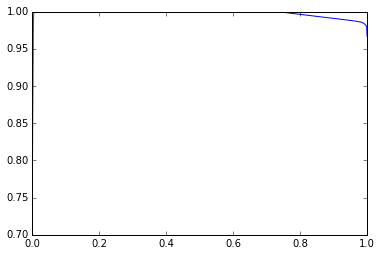

In [3]:

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
train_data = washed_df.values
forest = forest.fit(train_data[0::,1::],train_data[0::,0] )

from sklearn import cross_validation
forest_scores = cross_validation.cross_val_score(forest,train_data[0::,1::], train_data[0::,0],cv=5)
print forest_scores.mean()



from sklearn import metrics
from sklearn.metrics import precision_recall_curve
y_true = train_data[0::,0]
y_scores = forest.predict_proba(train_data[0::,1::])

precision, recall, thresholds = precision_recall_curve(y_true, y_scores[0::,1])


plt.plot( recall,precision)
print metrics.auc(recall,precision)


fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores[0::,1])
plt.plot( fpr, tpr)
print metrics.auc(fpr, tpr)
print forest.score(train_data[0::,1::],y_true)
